<h1><center>
Método de Euler</h1>
<h3><center>Mauricio Aguas Fonseca </h3>

El siguiente código resuelve de manera númerica ecuaciones diferenciales ordinarias de primer orden usando el "Método de Euler" y el "Método de Euler Mejorado". 


In [1]:
#=
Método_de_Euler_Mejorado
Parámetros:
y_prima: función que representa la derivada de y en nuestra Ecuación Diferencial de Primer Orden
(tiene que ser de la forma y_prima= f(y,x))
y_0: valor inicial de y 
x_0: valor inicial de x 
h: tamaño del paso
inicio: valor inicial de x para el intervalo de solución
fin: valor final de x para el intervalo de solución

Regresa:
x: vector con los valores de x
y: vector con los valores de y'=f(y,x)
=#
function método_de_euler(y_prima, y_0, x_0, h, inicio, fin)
    y = []
    x = []
    push!(y, y_0)
    push!(x, x_0)
    n_iteraciones = (fin - inicio)/h
    for i in 1:n_iteraciones
        y_0 = y_0 + h*y_prima(y_0, x_0)
        x_0 = x_0 + h
        push!(y, y_0)
        push!(x, x_0)
    end
    return x,y
end


método_de_euler (generic function with 1 method)

In [2]:
#=
Método_de_Euler_Mejorado
Parámetros:
y_prima: función que representa la derivada de y en nuestra Ecuación Diferencial de Primer Orden
(tiene que ser de la forma y_prima= f(y,x))
y_0: valor inicial de y 
x_0: valor inicial de x 
h: tamaño del paso
inicio: valor inicial de x para el intervalo de solución
fin: valor final de x para el intervalo de solución

Regresa:
x: vector con los valores de x
y: vector con los valores de y'=f(y,x)
=#

function método_de_euler_mejorado(y_prima, y_0, x_0, h, inicio, fin)
    y = []
    x = []
    push!(y, y_0)
    push!(x, x_0)
    n_iteraciones = (fin - inicio)/h
    y_proxima = 0
    for i in 1:n_iteraciones
        y_proxima = y_0 + h*y_prima(y_0, x_0)
        y_0 = y_0 + h*(y_prima(y_0, x_0) + y_prima(y_proxima, x_0 + h))/2
        x_0 = x_0 + h
        push!(y, y_0)
        push!(x, x_0)
    end
    return x,y
end

método_de_euler_mejorado (generic function with 1 method)

<script src="https://polyfill.io/v3/polyfill.min.js?features=es6"></script>
<script>
MathJax = {
  tex: {
    inlineMath: [['$', '$'], ['\\(', '\\)']],
    displayMath: [['$$', '$$'], ['\\[', '\\]']],
    processEscapes: true,
    processEnvironments: true,
    processRefs: true
  },
  options: {
    skipHtmlTags: [
      'script', 'noscript', 'style', 'textarea', 'pre',
      'code', 'annotation', 'annotation-xml'
    ],
    renderActions: {
      find: [10, 50, 90, 130],
      compile: [30, 70, 110, 150],
      translate: [20, 60, 100, 140],
      typeset: [40, 80, 120, 160]
    }
  },
  loader: {
    load: ['[tex]/noerrors']
  }
};
</script>
<script id="MathJax-script" async="true" src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-chtml.js"></script>


<h3> Ejemplo de Uso <h3>


Tomemos el siguiente problema de valores iniciales:
$$ 
\begin{cases}
    y' = 3y \\
    y(0)=1
\end{cases}
$$
Suponiendo que $\forall x \in D (y(x) \neq 0)$. Resolviendo la ecuación diferencial tenemos que: 
$$
y' = 3y \iff \frac{y'}{y} = 3 \iff (\ln(y))' = (3x)' \iff ln(y)=3x+c \iff y = e^{3x+c}
$$
Aplicando nuestras condiciones iniciales:
$$
   1 = e^c \iff c = 0
$$
Y por lo tanto la solución a nuestra ecuación diferencial es:
$$
y = e^{3x}
$$
Comparemos nuestra solución exacta con los obtenidos con nuestros dos metódos.

In [3]:
function y_prima(y, x) # Damos nuestra y' = f(y,x)
    return 3*y + 0*x
end

y_prima (generic function with 1 method)

In [4]:
function function_solución(x) #Damos nuestra solución analítica
    return exp(3*x)
end

function_solución (generic function with 1 method)

In [5]:
using Plots # Incluimos la libreria para graficar

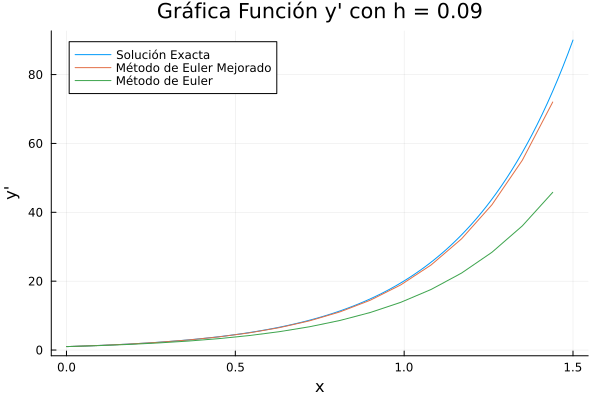

In [6]:
inicio = 0 #inidcamos en donde queremos que empiece nuestra gráfica
fin = 1.5  #indicamos en donde queremos que termine nuestra gráfica
h = 0.09 #indicamos el tamaño del paso
##############################################################################################################
F = método_de_euler(y_prima, 1, 0, h, inicio, fin)
F2 = método_de_euler_mejorado(y_prima, 1, 0, h, inicio, fin)
x = range(inicio, fin, length = 100)
y = function_solución.(x)
plot(x, y, label = "Solución Exacta", title = "Gráfica Función y' con h = $h", xlabel = "x", ylabel = "y'")
plot!(F2[1],F2[2], label = "Método de Euler Mejorado")
plot!(F[1], F[2], label = "Método de Euler")